In [4]:
#Unzip the  dataset
 !unzip Data_Cars_and_Trucks.zip

Archive:  Data_Cars_and_Trucks.zip
   creating: Datasets/
  inflating: Datasets/.DS_Store      
   creating: __MACOSX/
   creating: __MACOSX/Datasets/
  inflating: __MACOSX/Datasets/._.DS_Store  
   creating: Datasets/car/
  inflating: Datasets/car/.DS_Store  
   creating: __MACOSX/Datasets/car/
  inflating: __MACOSX/Datasets/car/._.DS_Store  
  inflating: Datasets/car/100171.jpg  
  inflating: Datasets/car/102685.jpg  
  inflating: Datasets/car/103773.jpg  
  inflating: Datasets/car/111104.jpg  
  inflating: Datasets/car/115988.jpg  
  inflating: Datasets/car/119092.jpg  
  inflating: Datasets/car/128887.jpg  
  inflating: Datasets/car/130726.jpg  
  inflating: Datasets/car/13193.jpg  
  inflating: Datasets/car/137920.jpg  
  inflating: Datasets/car/139345.jpg  
  inflating: Datasets/car/141101.jpg  
  inflating: Datasets/car/143302.jpg  
  inflating: Datasets/car/145185.jpg  
  inflating: Datasets/car/145195.jpg  
  inflating: Datasets/car/145512.jpg  
  inflating: Datasets/car/14607

Found 629 images belonging to 2 classes.
Found 159 images belonging to 2 classes.
Epoch 1/100
20/19 [==============================] - 13s 636ms/step - loss: 1.1648 - acc: 0.5223 - val_loss: 1.1351 - val_acc: 0.5288
Epoch 2/100
20/19 [==============================] - 10s 510ms/step - loss: 0.7466 - acc: 0.5997 - val_loss: 0.7312 - val_acc: 0.5550
Epoch 3/100
20/19 [==============================] - 11s 527ms/step - loss: 0.6904 - acc: 0.5809 - val_loss: 0.6490 - val_acc: 0.6126
Epoch 4/100
20/19 [==============================] - 10s 511ms/step - loss: 0.6793 - acc: 0.6114 - val_loss: 0.6915 - val_acc: 0.5393
Epoch 5/100
20/19 [==============================] - 10s 518ms/step - loss: 0.6566 - acc: 0.6153 - val_loss: 0.6523 - val_acc: 0.5579
Epoch 6/100
20/19 [==============================] - 10s 515ms/step - loss: 0.6534 - acc: 0.6192 - val_loss: 0.6314 - val_acc: 0.6126
Epoch 7/100
20/19 [==============================] - 10s 514ms/step - loss: 0.6319 - acc: 0.6669 - val_loss: 0.631

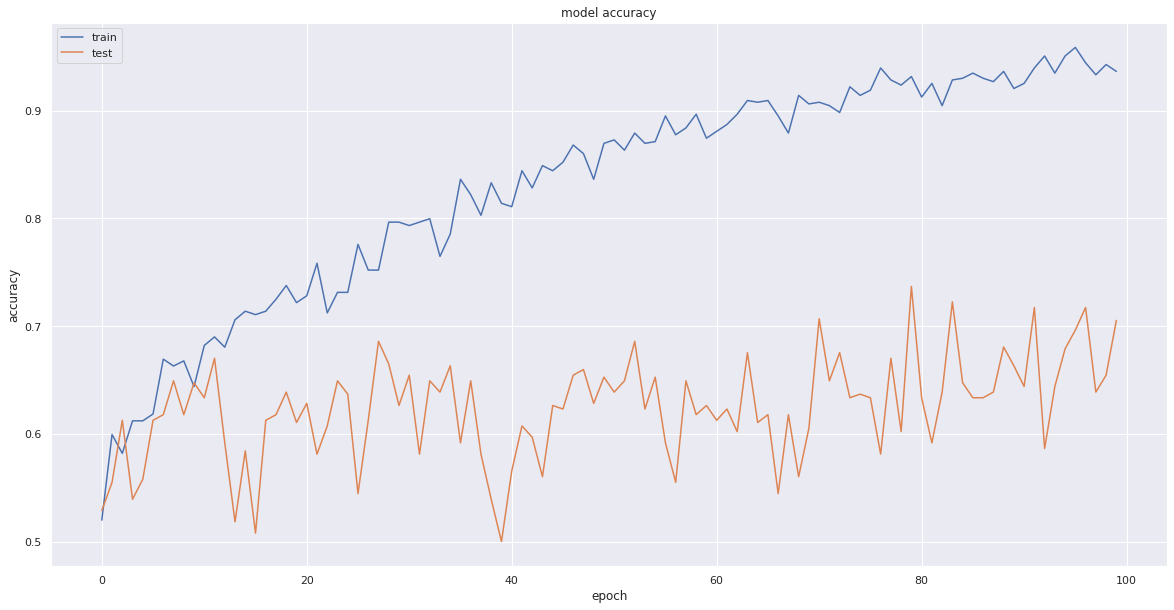

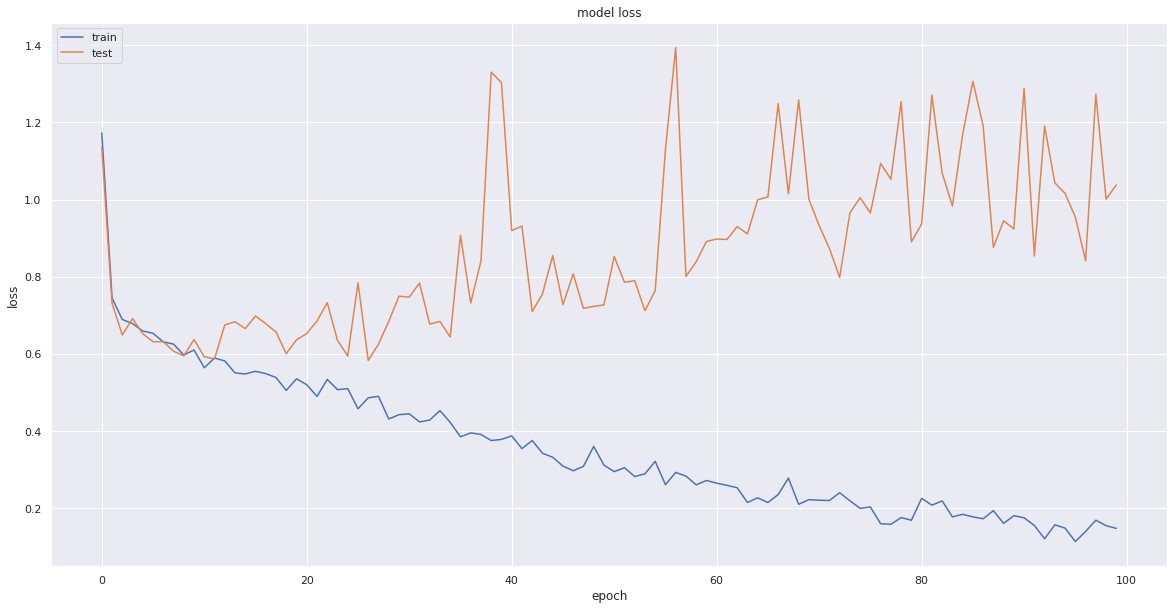

In [32]:
#Model : 1
!pip install split_folders tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
 


# split Dataset folder into train and val folders
import split_folders
split_folders.ratio('/content/Datasets', output="data", seed=1337, ratio=(.8, .2))


'''Note: delete image 181355.jpg from train folder since it is corrupted'''

def create_model(p,input_shape):
    # Initialising the CNN
    model = Sequential()
    # Convolution + Pooling Layer 
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    # Convolution + Pooling Layer 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    # Convolution + Pooling Layer 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Convolution + Pooling Layer 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flattening
    model.add(Flatten())
    
    # Fully connection
    model.add(Dropout(p))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(p/2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compiling the CNN
    optimizer = Adam(lr=1e-3)
    metrics=['accuracy']
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metrics)
    return model


# Train the model with  ImageDataGenerator (data augmentation)

bs = 32       # batch_size- Higer the value less time for training  
epochs = 100  #given the batch size, 100 epochs is optimum
height = 64   #image dimensions
width = 64

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/data/train',
                                             target_size = (height, width),
                                             batch_size = bs,
                                             class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/data/val',
                                        target_size = (height, width),
                                        batch_size = bs,
                                        class_mode = 'binary')


model = create_model(p=0.5,input_shape=(height, width,3))                                

# store model metrics

History = model.fit_generator(training_set,
                     steps_per_epoch=627/bs,
                     epochs = epochs,
                     validation_data = test_set,
                     validation_steps = 161/bs)


# Model metrics visualization 

plt.figure(figsize = (20,10))

# summarize history for accuracy
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure(figsize = (20,10))

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#save model
model.save('model.h5')


In [0]:

from keras.models import load_model
import cv2
import numpy as np

# Make predictions


def predict(model_path,img_path ):
  #load model
  model = load_model(model_path)

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  img = cv2.imread(img_path)
  img = cv2.resize(img,(64,64),interpolation=cv2.INTER_LINEAR)
  img = np.reshape(img,[1,64,64,3])

  classes = model.predict_classes(img)
  if classes[0][0] == 0:
      prediction = 'car'
  else:
      prediction = 'truck'

  #visualize output 
  plt.figure(figsize = (20,10))
  im = cv2.imread(img_path)
  im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
  plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
  plt.title(prediction)
  plt.show()



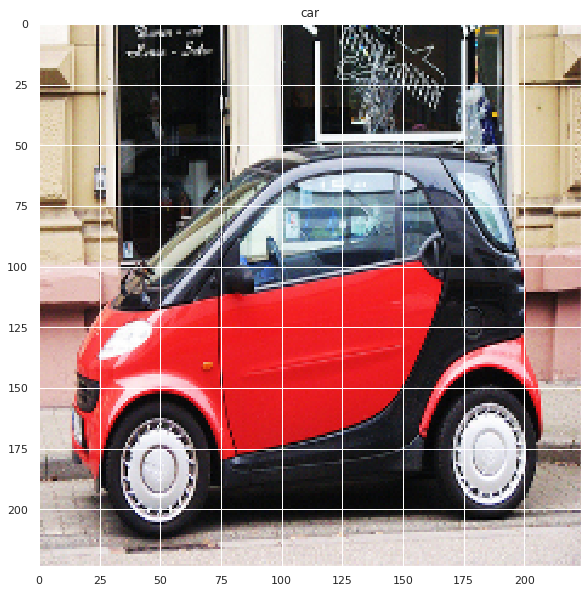

In [60]:
img_path = '/content/data/val/car/13193.jpg'
model_path = '/content/model.h5'

predict(model_path,img_path )

In [56]:
classes

array([[0]], dtype=int32)